## Лабораторная работа

### Демешко Алеся, 797

### 1.Требуется реализовать метод Ньютона:
$x_{k+1} = x_{k} - (\nabla ^{2}f(x_{k}))^{-1}\nabla f(x_{k})$

В качестве первой исследуемой функции возьмём функцию из домашнего задания $f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$. Там мы получили точку минимума $(0, 1)$.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

def gradient_sx(point_x): #вторая производная по x в точке point_x
    return 4

def gradient_sy(point_y): #вторая производная по y в точке point_y
    return 12 * point_y ** 2 - 4

def gradient_xy(point_x, point_y): #производная по x, затем по y
    return 0

In [3]:
def newtons_method(a):
    g1 = gradient_x(a[0])
    g2 = gradient_y(a[1])
    g = np.array([g1, g2])
    a00 = gradient_sx(a[0])
    a01 = gradient_xy(a[0], a[1])
    a10 = gradient_xy(a[0], a[1])
    a11 = gradient_sy(a[1])
    m = np.array([[a00, a01], [a10, a11]])
    im = np.linalg.inv(m)
    x = a - np.array(np.dot(im, g))
    print(x)
    return x

In [4]:
a = np.array([7, 10])
coor_x = []
coor_y = []
coor_z = []
for x in range(10):
    b = newtons_method(a)
    coor_x.append(b[0])
    coor_y.append(b[1])
    coor_z.append(f(b[0], b[1]))
    a = b

[0.         6.68896321]
[0.        4.4927804]
[0.         3.04547953]
[0.         2.10600774]
[0.         1.51809807]
[0.         1.18319971]
[0.         1.03530863]
[0.         1.00172782]
[0.         1.00000446]
[0. 1.]


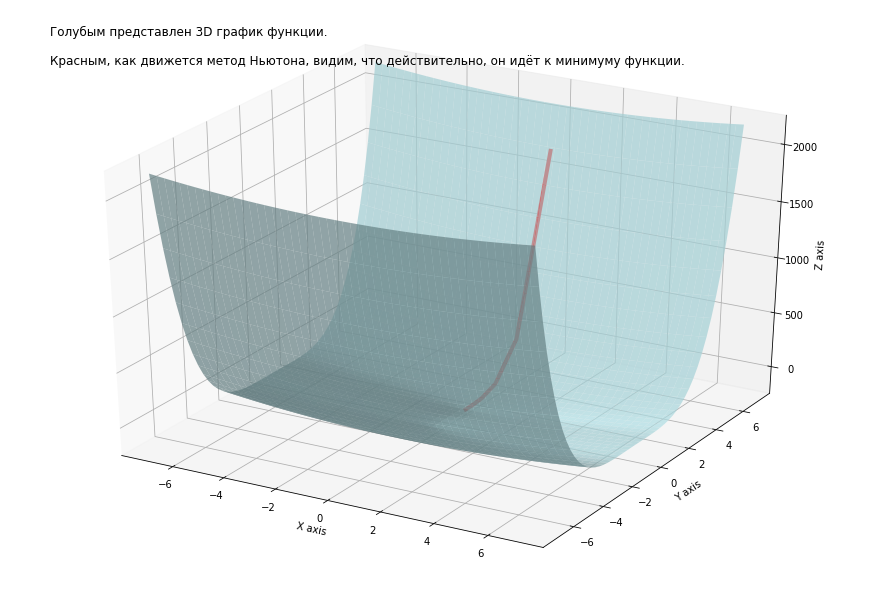

In [5]:
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(coor_x, coor_y, coor_z, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha = 0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize = 12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется метод Ньютона, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Рассмотрим сильно выпуклую функцию $f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$, её минимум это точка $(1, -1)$

In [6]:
def f(x, y):
    return (1 - x) ** 2 + (y + x ** 2) ** 2

def gradient_x(point_x, point_y):
    return -2 + 2 * point_x + 4 * point_x * point_y + 4 * point_x ** 3

def gradient_y(point_x, point_y):
    return 2 * point_y + 2 * point_x ** 2

def gradient_sx(point_x, point_y):
    return 2 + 4 * point_x + 12 * point_x ** 2

def gradient_sy(point_x, point_y):
    return 2

def gradient_xy(point_x, point_y):
    return 4 * point_x

In [7]:
def newtons_method(a):
    g1 = gradient_x(a[0], a[1])
    g2 = gradient_y(a[0], a[1])
    g = np.array([g1, g2])
    a00 = gradient_sx(a[0], a[1])
    a01 = gradient_xy(a[0], a[1])
    a10 = gradient_xy(a[0], a[1])
    a11 = gradient_sy(a[0], a[1])
    m = np.array([[a00, a01], [a10, a11]])
    im = np.linalg.inv(m)
    x = a - np.array(np.dot(im, g))
    return x

In [8]:
a = np.array([7, 10])
for x in range(15):
    b = newtons_method(a)
    a = b
print(a) #видим, что 15 шагов мало

[  6.1721705  -38.09239154]


In [9]:
a = np.array([7, 10])
for x in range(50):
    b = newtons_method(a)
    a = b
print(a) #видим, что 50 шагов также мало

[  3.89929524 -15.19911844]


In [10]:
a = np.array([7, 10])
for x in range(100):
    b = newtons_method(a)
    a = b
print(a) #видим, что 100 шагов примерно хватает, и если ещё раз увеличим число шагов, будет больше точность

[ 1.01635238 -1.03295643]


In [11]:
a = np.array([7, 10])
coor_x = []
coor_y = []
coor_z = []
for x in range(200):
    b = newtons_method(a)
    coor_x.append(b[0])
    coor_y.append(b[1])
    coor_z.append(f(b[0], b[1]))
    a = b
print(a) #видим, что при примерно 200 итераций мы точно находим точку минимума

[ 1. -1.]


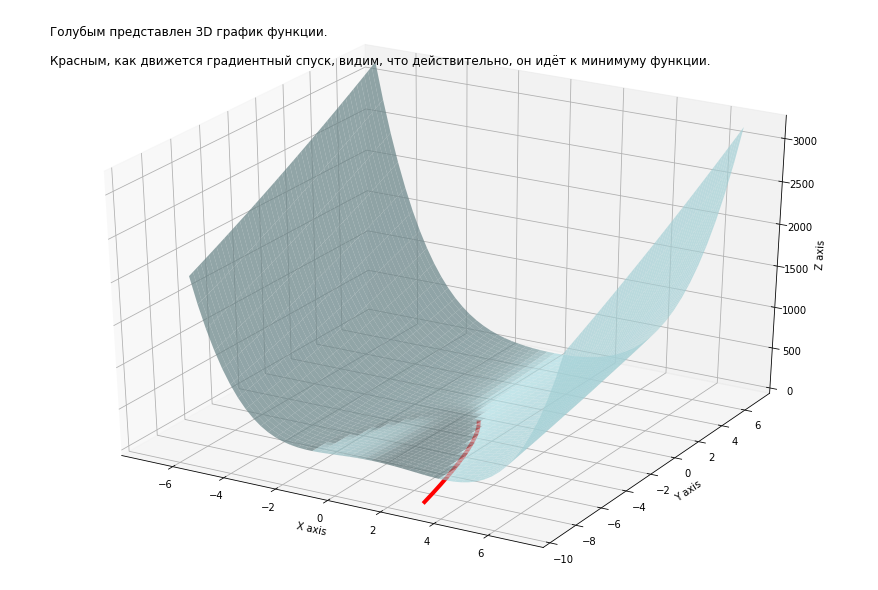

In [12]:
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = (1 - x) ** 2 + (y + x ** 2) ** 2
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(coor_x[60:], coor_y[60:], coor_z[60:], color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha=0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize=12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется градиентный спуск, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Теперь рассмотрим функцию трёх переменных: $f(x, y, z) = -x^{2}-5y^{2}-3z^{2} + xy - 2xz + 2yz + 11x + 2y + 18z + 10$, её максимум это точка $(4, 1, 2)$

In [13]:
def f(x, y, z):
    return - x ** 2 - 5 * y ** 2 - 3 * z ** 2 + x * y - 2 * x * z + 2 * y * z + 11 * x + 2 * y + 18 * z + 10

def gradient_x(point_x, point_y, point_z):
    return -2 * point_x + point_y - 2 * point_z + 11

def gradient_y(point_x, point_y, point_z):
    return -10 * point_y + point_x + 2 * point_z + 2

def gradient_z(point_x, point_y, point_z):
    return -6 * point_z - 2 * point_x + 2 * point_y + 18

def gradient_sx(point_x, point_y, point_z):
    return -2

def gradient_sy(point_x, point_y, point_z):
    return -10

def gradient_sz(point_x, point_y, point_z):
    return -6

def gradient_xy(point_x, point_y, point_z):
    return 1

def gradient_xz(point_x, point_y, point_z):
    return -2

def gradient_yz(point_x, point_y, point_z):
    return 2

In [14]:
def newtons_method(a):
    g1 = gradient_x(a[0], a[1], a[2])
    g2 = gradient_y(a[0], a[1], a[2])
    g3 = gradient_z(a[0], a[1], a[2])
    g = np.array([g1, g2, g3])
    a00 = gradient_sx(a[0], a[1], a[2])
    a01 = gradient_xy(a[0], a[1], a[2])
    a02 = gradient_xz(a[0], a[1], a[2])
    a10 = gradient_xy(a[0], a[1], a[2])
    a11 = gradient_sy(a[0], a[1], a[2])
    a12 = gradient_yz(a[0], a[1], a[2])
    a20 = gradient_xz(a[0], a[1], a[2])
    a21 = gradient_yz(a[0], a[1], a[2])
    a22 = gradient_sz(a[0], a[1], a[2])
    m = np.array([[a00, a01, a02], [a10, a11, a12], [a20, a21, a22]])
    im = np.linalg.inv(m)
    x = a - np.array(np.dot(im, g))
    return x

In [15]:
a = np.array([5, 5, 5])
for x in range(100):
    b = newtons_method(a)
    a = b
print(a) #видим, что действительно метод Ньютона нашёл точку экстремума

[4. 1. 2.]


### 2. Метод Давидона-Флетчера-Пауэлла

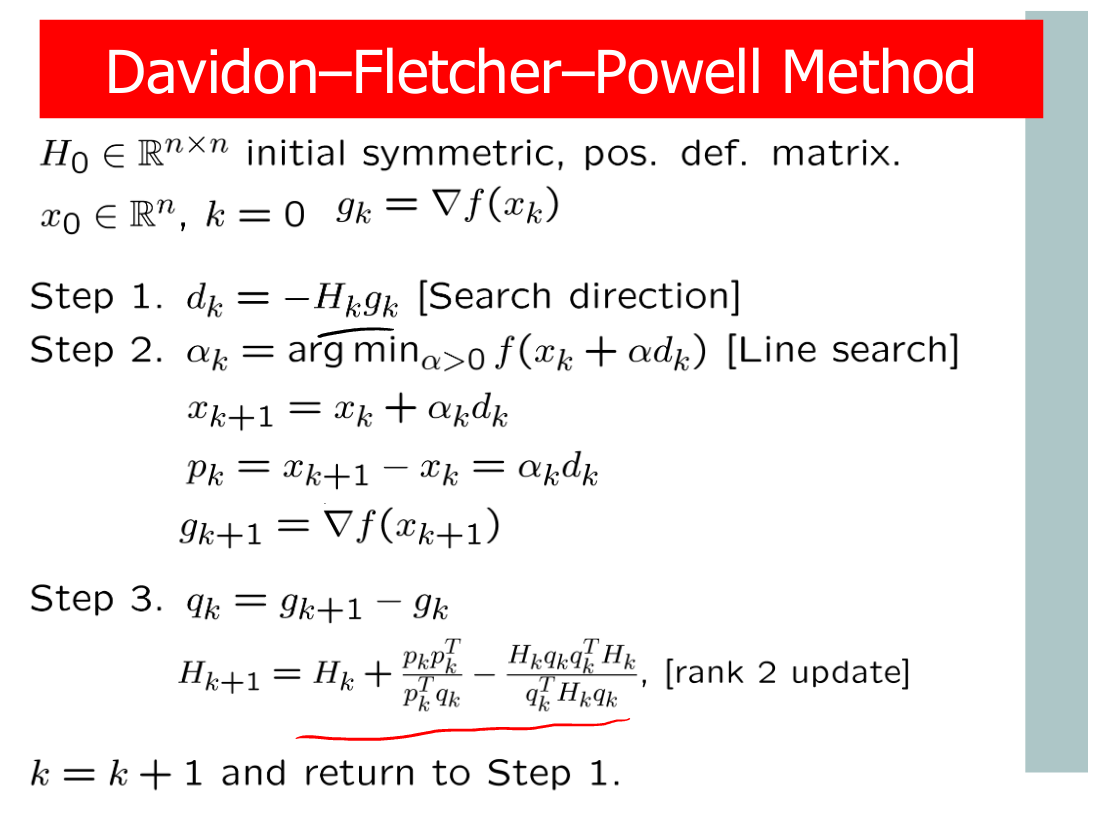

In [16]:
from IPython.display import Image
Image(filename='dfp.png')

В качестве первой исследуемой функции возьмём функцию из домашнего задания $f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$. Там мы получили точку минимума $(0, 1)$.

In [80]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

def gradient_sx(point_x): #вторая производная по x в точке point_x
    return 4

def gradient_sy(point_y): #вторая производная по y в точке point_y
    return 12 * point_y ** 2 - 4

def gradient_xy(point_x, point_y): #производная по x, затем по y
    return 0

In [81]:
def dfp(a):
    g1 = gradient_x(a[0])
    g2 = gradient_y(a[1])
    g = np.array([g1, g2])
    global m
    dk = -np.array(m@g)
    alpha = np.arange(0.001, 10, 0.01)
    ar = []
    for x in alpha:
        ar.append(f(a[0] - x * dk[0], a[1] - x * dk[1]))
    alk = alpha[np.argmin(ar)]
    xkp = a + alk * dk
    pk = xkp - a
    gk1 = gradient_x(xkp[0])
    gk2 = gradient_y(xkp[1])
    gk = np.array([gk1, gk2])
    qk = gk - g
    ss = np.dot(pk.reshape(-1, 1), pk.reshape(1, -1))
    zn = np.dot(pk, qk)
    ss = ss / zn
    sch = np.dot(qk.reshape(-1, 1), qk.reshape(1, -1))
    ls = m@sch@m
    znl = qk.reshape(1, -1)@m@qk.reshape(-1, 1)
    ls = ls / znl
    mk = m + ss - ls
    m = mk
    return xkp

In [87]:
a = np.array([7, 10])
m = np.array([[1, 0], [0, 1]])

coor_x = []
coor_y = []
coor_z = []

for x in range(8000):
    b = dfp(a)
    coor_x.append(b[0])
    coor_y.append(b[1])
    coor_z.append(f(b[0], b[1]))
    a = b
    
a

array([0.00231925, 1.03423001])

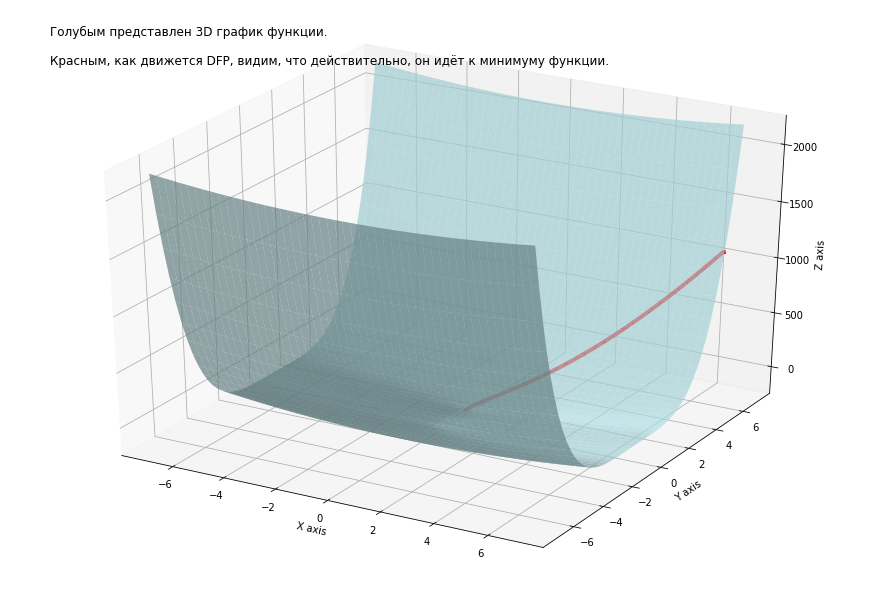

In [88]:
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(coor_x, coor_y, coor_z, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha = 0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize = 12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется DFP, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Рассмотрим сильно выпуклую функцию $f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$, её минимум это точка $(1, -1)$

In [89]:
def f(x, y):
    return (1 - x) ** 2 + (y + x ** 2) ** 2

def gradient_x(point_x, point_y):
    return -2 + 2 * point_x + 4 * point_x * point_y + 4 * point_x ** 3

def gradient_y(point_x, point_y):
    return 2 * point_y + 2 * point_x ** 2

def gradient_sx(point_x, point_y):
    return 2 + 4 * point_x + 12 * point_x ** 2

def gradient_sy(point_x, point_y):
    return 2

def gradient_xy(point_x, point_y):
    return 4 * point_x

In [90]:
def dfp(a):
    g1 = gradient_x(a[0], a[1])
    g2 = gradient_y(a[0], a[1])
    g = np.array([g1, g2])
    global m
    dk = -np.array(m@g)
    alpha = np.arange(0.001, 1, 0.001)
    ar = []
    for x in alpha:
        ar.append(f(a[0] - x * dk[0], a[1] - x * dk[1]))
    alk = alpha[np.argmin(ar)]
    xkp = a + alk * dk
    pk = xkp - a
    gk1 = gradient_x(xkp[0], xkp[1])
    gk2 = gradient_y(xkp[0], xkp[1])
    gk = np.array([gk1, gk2])
    qk = gk - g
    ss = np.dot(pk.reshape(-1, 1), pk.reshape(1, -1))
    zn = np.dot(pk, qk)
    ss = ss / zn
    sch = np.dot(qk.reshape(-1, 1), qk.reshape(1, -1))
    ls = m@sch@m
    znl = qk.reshape(1, -1)@m@qk.reshape(-1, 1)
    ls = ls / znl
    mk = m + ss - ls
    m = mk
    return xkp

In [91]:
m = np.array([[1, 0], [0, 1]])
a = np.array([7, 10])

coor_x = []
coor_y = []
coor_z = []

for x in range(10000):
    b = dfp(a)
    coor_x.append(b[0])
    coor_y.append(b[1])
    coor_z.append(f(b[0], b[1]))
    a = b
    
a

array([ 1.01546134, -1.02932735])

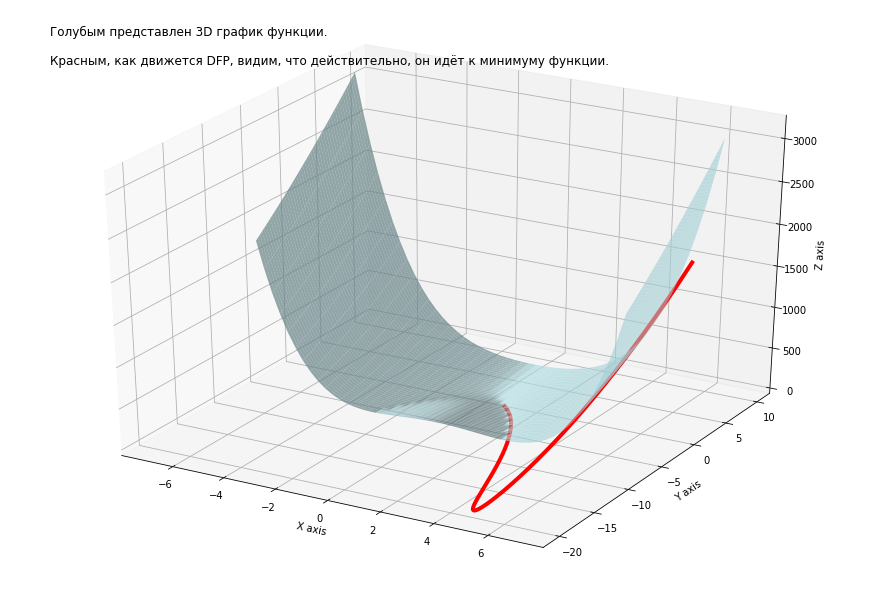

In [92]:
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = (1 - x) ** 2 + (y + x ** 2) ** 2
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(coor_x, coor_y, coor_z, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha = 0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize = 12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется DFP, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Теперь рассмотрим функцию трёх переменных: $f(x, y, z) = -x^{2}-5y^{2}-3z^{2} + xy - 2xz + 2yz + 11x + 2y + 18z + 10$, её максимум это точка $(4, 1, 2)$

In [58]:
def f(x, y, z):
    return - x ** 2 - 5 * y ** 2 - 3 * z ** 2 + x * y - 2 * x * z + 2 * y * z + 11 * x + 2 * y + 18 * z + 10

def gradient_x(point_x, point_y, point_z):
    return -2 * point_x + point_y - 2 * point_z + 11

def gradient_y(point_x, point_y, point_z):
    return -10 * point_y + point_x + 2 * point_z + 2

def gradient_z(point_x, point_y, point_z):
    return -6 * point_z - 2 * point_x + 2 * point_y + 18

def gradient_sx(point_x, point_y, point_z):
    return -2

def gradient_sy(point_x, point_y, point_z):
    return -10

def gradient_sz(point_x, point_y, point_z):
    return -6

def gradient_xy(point_x, point_y, point_z):
    return 1

def gradient_xz(point_x, point_y, point_z):
    return -2

def gradient_yz(point_x, point_y, point_z):
    return 2

In [59]:
def dfp(a):
    g1 = gradient_x(a[0], a[1], a[2])
    g2 = gradient_y(a[0], a[1], a[2])
    g3 = gradient_z(a[0], a[1], a[2])
    g = np.array([g1, g2, g3])
    global m
    dk = -np.array(m@g)
    alpha = np.arange(0.001, 1, 0.001)
    ar = []
    for x in alpha:
        ar.append(f(a[0] - x * dk[0], a[1] - x * dk[1], a[2] - x * dk[2]))
    alk = alpha[np.argmin(ar)]
    xkp = a + alk * dk
    pk = xkp - a
    gk1 = gradient_x(xkp[0], xkp[1], xkp[2])
    gk2 = gradient_y(xkp[0], xkp[1], xkp[2])
    gk3 = gradient_z(xkp[0], xkp[1], xkp[2])
    gk = np.array([gk1, gk2, gk3])
    qk = gk - g
    ss = np.dot(pk.reshape(-1, 1), pk.reshape(1, -1))
    zn = np.dot(pk, qk)
    ss = ss / zn
    sch = np.dot(qk.reshape(-1, 1), qk.reshape(1, -1))
    ls = m@sch@m
    znl = qk.reshape(1, -1)@m@qk.reshape(-1, 1)
    ls = ls / znl
    mk = m + ss - ls
    m = mk
    return xkp

In [60]:
m = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
a = np.array([5, 5, 5])

for x in range(100):
    b = dfp(a)
    a = b
    
a

array([4., 1., 2.])

### 3. Метод Бройдена — Флетчера — Гольдфарба — Шанно

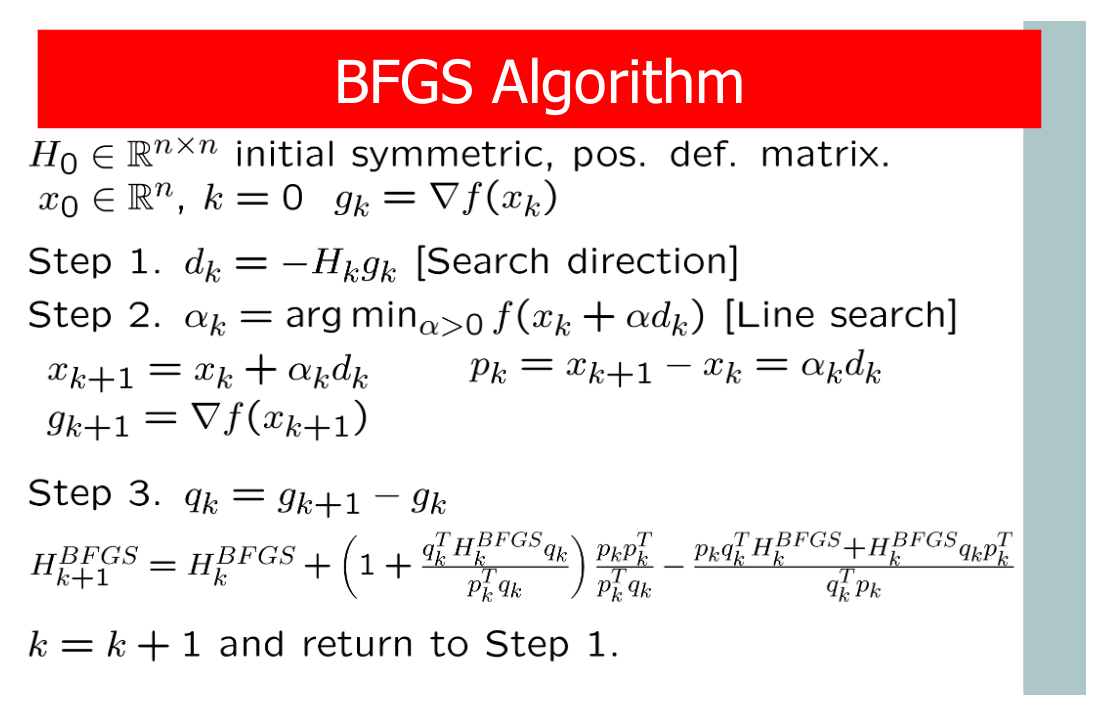

In [61]:
Image(filename='bfgs.png')

В качестве первой исследуемой функции возьмём функцию из домашнего задания $f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$. Там мы получили точку минимума $(0, 1)$.

In [93]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

def gradient_sx(point_x): #вторая производная по x в точке point_x
    return 4

def gradient_sy(point_y): #вторая производная по y в точке point_y
    return 12 * point_y ** 2 - 4

def gradient_xy(point_x, point_y): #производная по x, затем по y
    return 0

In [94]:
def bfgs(a):
    g1 = gradient_x(a[0])
    g2 = gradient_y(a[1])
    g = np.array([g1, g2])
    global m
    dk = -np.array(m@g)
    alpha = np.arange(0.001, 10, 0.01)
    ar = []
    for x in alpha:
        ar.append(f(a[0] - x * dk[0], a[1] - x * dk[1]))
    alk = alpha[np.argmin(ar)]
    xkp = a + alk * dk
    pk = xkp - a
    gk1 = gradient_x(xkp[0])
    gk2 = gradient_y(xkp[1])
    gk = np.array([gk1, gk2])
    qk = gk - g
    ss = np.dot(pk.reshape(-1, 1), pk.reshape(1, -1))
    zn = np.dot(pk, qk)
    ss = ss / zn
    chis = float(qk.reshape(1, -1)@m@qk.reshape(-1, 1))
    znam = np.dot(pk, qk)
    kk = 1 + chis / znam
    ll = np.dot(kk, ss)
    #ss = kk
    sch = pk.reshape(-1, 1)@qk.reshape(1, -1)@m + m@qk.reshape(-1, 1)@pk.reshape(1, -1)
    znl = qk.reshape(1, -1)@pk.reshape(-1, 1)
    ls = sch / znl
    mk = m + ll - ls
    m = mk
    return xkp

In [98]:
m = np.array([[1, 0], [0, 1]])
a = np.array([7, 10])

coor_x = []
coor_y = []
coor_z = []

for x in range(10000):
    b = bfgs(a)
    coor_x.append(b[0])
    coor_y.append(b[1])
    coor_z.append(f(b[0], b[1]))
    a = b
    
a

array([3.14252085e-04, 1.00483165e+00])

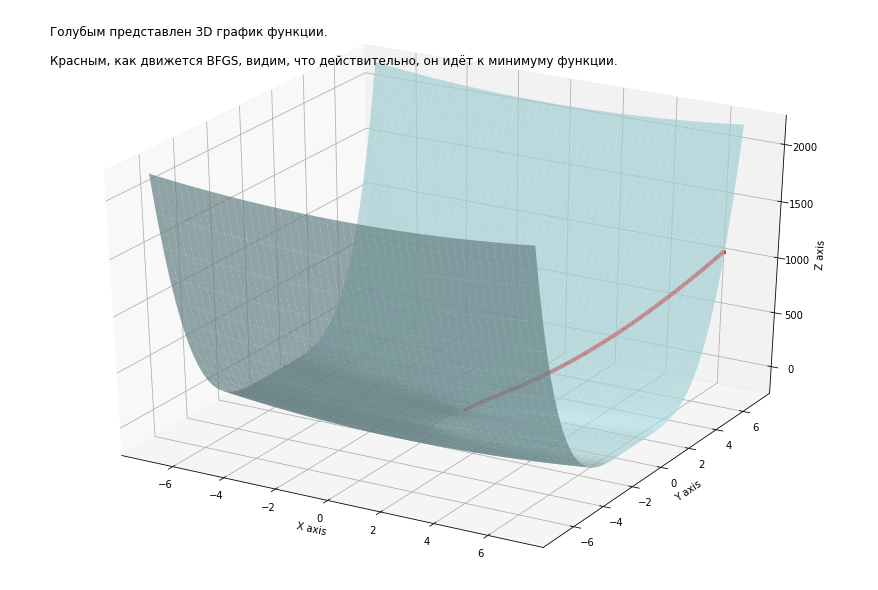

In [99]:
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(coor_x, coor_y, coor_z, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha = 0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize = 12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется BFGS, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Рассмотрим сильно выпуклую функцию $f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$, её минимум это точка $(1, -1)$

In [100]:
def f(x, y):
    return (1 - x) ** 2 + (y + x ** 2) ** 2

def gradient_x(point_x, point_y):
    return -2 + 2 * point_x + 4 * point_x * point_y + 4 * point_x ** 3

def gradient_y(point_x, point_y):
    return 2 * point_y + 2 * point_x ** 2

def gradient_sx(point_x, point_y):
    return 2 + 4 * point_x + 12 * point_x ** 2

def gradient_sy(point_x, point_y):
    return 2

def gradient_xy(point_x, point_y):
    return 4 * point_x

In [101]:
def bfgs(a):
    g1 = gradient_x(a[0], a[1])
    g2 = gradient_y(a[0], a[1])
    g = np.array([g1, g2])
    global m
    dk = -np.array(m@g)
    alpha = np.arange(0.001, 10, 0.01)
    ar = []
    for x in alpha:
        ar.append(f(a[0] - x * dk[0], a[1] - x * dk[1]))
    alk = alpha[np.argmin(ar)]
    xkp = a + alk * dk
    pk = xkp - a
    gk1 = gradient_x(xkp[0], xkp[1])
    gk2 = gradient_y(xkp[0], xkp[1])
    gk = np.array([gk1, gk2])
    qk = gk - g
    ss = np.dot(pk.reshape(-1, 1), pk.reshape(1, -1))
    zn = np.dot(pk, qk)
    ss = ss / zn
    chis = float(qk.reshape(1, -1)@m@qk.reshape(-1, 1))
    znam = np.dot(pk, qk)
    kk = 1 + chis / znam
    ll = np.dot(kk, ss)
    #ss = kk
    sch = pk.reshape(-1, 1)@qk.reshape(1, -1)@m + m@qk.reshape(-1, 1)@pk.reshape(1, -1)
    znl = qk.reshape(1, -1)@pk.reshape(-1, 1)
    ls = sch / znl
    mk = m + ll - ls
    m = mk
    return xkp

In [102]:
m = np.array([[1, 0], [0, 1]])
a = np.array([7, 10])

coor_x = []
coor_y = []
coor_z = []

for x in range(10000):
    b = bfgs(a)
    coor_x.append(b[0])
    coor_y.append(b[1])
    coor_z.append(f(b[0], b[1]))
    a = b
    
a

array([ 1.01545867, -1.0293234 ])

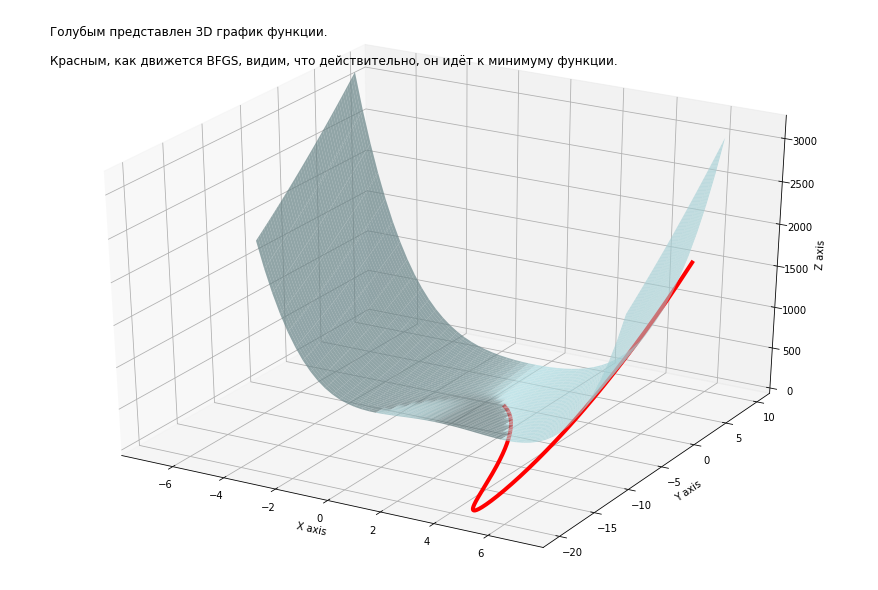

In [103]:
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = (1 - x) ** 2 + (y + x ** 2) ** 2
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(coor_x, coor_y, coor_z, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha = 0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize = 12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется BFGS, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Теперь рассмотрим функцию трёх переменных: $f(x, y, z) = -x^{2}-5y^{2}-3z^{2} + xy - 2xz + 2yz + 11x + 2y + 18z + 10$, её максимум это точка $(4, 1, 2)$

In [76]:
def f(x, y, z):
    return - x ** 2 - 5 * y ** 2 - 3 * z ** 2 + x * y - 2 * x * z + 2 * y * z + 11 * x + 2 * y + 18 * z + 10

def gradient_x(point_x, point_y, point_z):
    return -2 * point_x + point_y - 2 * point_z + 11

def gradient_y(point_x, point_y, point_z):
    return -10 * point_y + point_x + 2 * point_z + 2

def gradient_z(point_x, point_y, point_z):
    return -6 * point_z - 2 * point_x + 2 * point_y + 18

In [79]:
def bfgs(a):
    g1 = gradient_x(a[0], a[1], a[2])
    g2 = gradient_y(a[0], a[1], a[2])
    g3 = gradient_z(a[0], a[1], a[2])
    g = np.array([g1, g2, g3])
    global m
    dk = -np.array(m@g)
    alpha = np.arange(0.001, 1, 0.01)
    ar = []
    for x in alpha:
        ar.append(f(a[0] - x * dk[0], a[1] - x * dk[1], a[2] - x * dk[2]))
    alk = alpha[np.argmin(ar)]
    xkp = a + alk * dk
    pk = xkp - a
    gk1 = gradient_x(xkp[0], xkp[1], xkp[2])
    gk2 = gradient_y(xkp[0], xkp[1], xkp[2])
    gk3 = gradient_z(xkp[0], xkp[1], xkp[2])
    gk = np.array([gk1, gk2, gk3])
    qk = gk - g
    ss = np.dot(pk.reshape(-1, 1), pk.reshape(1, -1))
    zn = np.dot(pk, qk)
    ss = ss / zn
    chis = float(qk.reshape(1, -1)@m@qk.reshape(-1, 1))
    znam = np.dot(pk, qk)
    kk = 1 + chis / znam
    ll = np.dot(kk, ss)
    #ss = kk
    sch = pk.reshape(-1, 1)@qk.reshape(1, -1)@m + m@qk.reshape(-1, 1)@pk.reshape(1, -1)
    znl = qk.reshape(1, -1)@pk.reshape(-1, 1)
    ls = sch / znl
    mk = m + ll - ls
    m = mk
    return xkp

In [78]:
m = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
a = np.array([10, 10, 10])

for x in range(20):
    b = bfgs(a)
    a = b
    
a

array([4., 1., 2.])

## Вывод
Мы реализовали три метода и все они находили минимумы функций. Метод Ньютона показал наилучшие результаты - за наименьшее число итераций по сравнению с другими методами он находит минимум функции. <br>
1) Метод Ньютона <br>
$f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$ - количество итераций = 10<br>
$f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$ - количество итераций = 200<br>
$f(x, y, z) = -x^{2}-5y^{2}-3z^{2} + xy - 2xz + 2yz + 11x + 2y + 18z + 10$  - количество итераций = 100<br>
2) Метод Давидона-Флетчера-Пауэлла <br>
$f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$  - количество итераций = 8000<br>
$f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$  - количество итераций = 10000<br>
$f(x, y, z) = -x^{2}-5y^{2}-3z^{2} + xy - 2xz + 2yz + 11x + 2y + 18z + 10$ - количество итераций = 100<br>
3) Метод Бройдена — Флетчера — Гольдфарба — Шанно <br>
$f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$ - количество итераций = 10000<br>
$f(x, y) = (1 - x)^{2} + (y + x^{2})^{2}$ - количество итераций = 10000<br>
$f(x, y, z) = -x^{2}-5y^{2}-3z^{2} + xy - 2xz + 2yz + 11x + 2y + 18z + 10$ - количество итераций = 20<br>